In [2]:
import pandas as pd
%matplotlib inline

data = pd.read_csv( 'AAL.csv', header='infer' )
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-27,21.049999,21.400000,19.100000,19.299999,18.438854,961200
1,2005-09-28,19.299999,20.530001,19.200001,20.500000,19.585306,5747900
2,2005-09-29,20.400000,20.580000,20.100000,20.209999,19.308243,1078200
3,2005-09-30,20.260000,21.049999,20.180000,21.010000,20.072554,3123300
4,2005-10-03,20.900000,21.750000,20.900000,21.500000,20.540686,1057900


[Text(0,0.5,'Closing Price')]

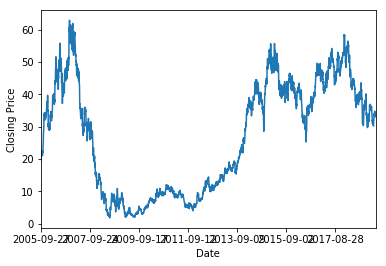

In [3]:
closingPrice = data['Close']
closingPrice.index = data['Date']
ax = closingPrice.plot(kind='line')
ax.set(ylabel='Closing Price')

Date
2005-09-28    1.200001
2005-09-29   -0.290001
2005-09-30    0.800001
2005-10-03    0.490000
2005-10-04    0.660000
dtype: float64

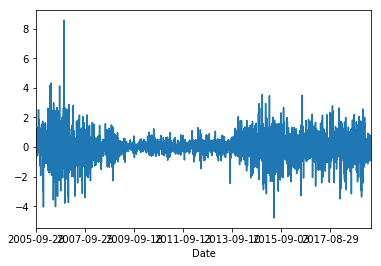

In [4]:
N = closingPrice.shape[0]
Y = pd.Series(closingPrice[1:N].values - closingPrice[:N-1].values, index=closingPrice.index[1:])
Y.plot(kind='line')
Y.head()

In [5]:
N = Y.shape[0]
X = pd.DataFrame( Y[:N-4].values,columns=['t-5'])
X['t-4'] = Y[1:N-3].values
X['t-3'] = Y[2:N-2].values
X['t-2'] = Y[3:N-1].values
X['t-1'] = Y[4:N].values
X = X[:-1]
X.index = Y[5:].index
X.head()

,t-5,t-4,t-3,t-2,t-1
Date,,,,,
2005-10-05,1.200001,-0.290001,0.800001,0.490000,0.660000
2005-10-06,-0.290001,0.800001,0.490000,0.660000,0.040001
2005-10-07,0.800001,0.490000,0.660000,0.040001,0.379999
2005-10-10,0.490000,0.660000,0.040001,0.379999,-0.430000
2005-10-11,0.660000,0.040001,0.379999,-0.430000,0.059999


In [6]:
y = Y[5:]
y.head()

Date
2005-10-05    0.040001
2005-10-06    0.379999
2005-10-07   -0.430000
2005-10-10    0.059999
2005-10-11   -0.229999
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(y_test, y_pred_test))
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Root mean squared error = 0.7798
R-square = -0.0028
Slope Coefficients: [ 0.02131587  0.00124648 -0.01036587 -0.0040454   0.03614702]
Intercept: -0.007722937563621101


In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV


scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)


params = {'n_neighbors':[x for x in range(2, 40)]}
knn = neighbors.KNeighborsRegressor()
regr = GridSearchCV(knn, params, cv=5)

# Create linear regression object
# regr = SVR(gamma='auto')

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(y_test, y_pred_test))
print("Explained variance: ", explained_variance_score(y_test, y_pred_test))

Root mean squared error = 0.7992
R-square = -0.0532
Explained variance:  -0.04665457826375774


In [12]:
len(x_train)

NameError: name 'x_train' is not defined